persepton

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting  import plot_decision_regions 

In [6]:
dataset=pd.read_csv(r"C:\Users\Manasa\Downloads\linear_placement_dataset.csv" )
dataset.head(3)

,CGPA_Scaled,Score_Scaled,Placement
0,-0.324780,-1.599303,1
1,1.621062,0.475131,1
2,0.884615,-0.628948,1


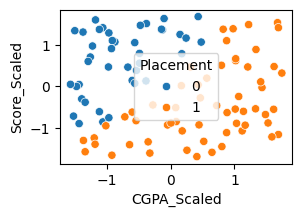

In [30]:
plt.figure(figsize=(3,2))
sns.scatterplot(x='CGPA_Scaled',y='Score_Scaled',hue='Placement',data=dataset)
plt.show()

In [31]:
x=dataset.iloc[:,:-1]
y=dataset['Placement']

In [46]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2, random_state=10)

In [47]:
from sklearn.linear_model import Perceptron

In [48]:
pe=Perceptron()
pe.fit(x_train, y_train)
pe.score(x_train, y_train)*100, pe.score(x_test,y_test)*100

(96.25, 95.0)

C:\Users\Manasa\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(


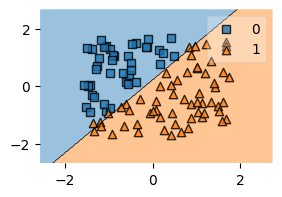

In [50]:
plt.figure(figsize=(3,2))
plot_decision_regions(x.to_numpy(),y.to_numpy(), clf=pe)
plt.show()

In [5]:
tup=12,32,43
print(type(tup))

<class 'tuple'>


In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
dataset=sns.load_dataset('iris')
dataset.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [1]:
# sns.lineplot(data=dataset, x='sepal_length',y='petal_length',hue='species',markers=True,style='petal_width',dashes=False)
# sns.histplot(x='sepal_length',kde=True,color='Green',data=dataset)
# plt.show()
# sns.kdeplot(data=dataset, x="sepal_length", hue="species", fill=True, alpha=0.6, linewidth=1.5)
# sns.boxplot(x='sepal_length',y='species',data=dataset)
# sns.jointplot(x='sepal_length',y='species',data=dataset)
# plt.show()


multilayer percepton ann for customer churn prediction

this model is not well accurate we need to improve its performance

In [208]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
dataset=pd.read_csv(r"C:\Users\Manasa\Downloads\synthetic_dataset_extended.csv")
dataset.head(3)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,559,60,4,180471.89,2,1,1,128389.95,0
1,594,28,8,142681.41,3,1,1,67745.86,1
2,606,50,8,30560.35,4,1,1,28446.98,1


In [209]:
dataset.isnull().sum().sum()

0

In [210]:
input_data=dataset.iloc[:,:-1]
output_data=dataset.iloc[:,-1]

In [211]:
input_data.shape

(11000, 8)

In [212]:
ss=StandardScaler()
input_data=pd.DataFrame(ss.fit_transform(input_data),columns=input_data.columns)

In [213]:
import tensorflow
from keras.layers import Dense,BatchNormalization
from keras.regularizers import L2
from keras.callbacks import EarlyStopping
from keras.models import Sequential

no.of col is 8 we are taking 6 as we are creating herarical model

this are the hidden layer 1,2,3,4

In [214]:
ann=Sequential()

model is still overfitting wrong even after a regulization , early stopping

batch normalize tech basically 

In [215]:

ann.add(Dense(6,input_dim=8,activation="relu",kernel_regularizer=L2(l2=0.01)))
ann.add(BatchNormalization())
ann.add(Dense(4,activation="relu",kernel_regularizer=L2(l2=0.01)))
ann.add(BatchNormalization())
ann.add(Dense(2,activation="relu",kernel_regularizer=L2(l2=0.01)))
ann.add(BatchNormalization())
ann.add(Dense(1,activation="sigmoid"))

C:\Users\Manasa\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [216]:
ann.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [217]:
x_train, x_test, y_train, y_test=train_test_split(input_data, output_data,test_size=0.2, random_state=42)

In [218]:
x_train.shape

(8800, 8)

batch_size=100 look into train data and 10 is how many times u want run 10, accuracy: 0.5245 - loss: 0.6926 

after changing epoches it reduced overfitting but accuracy is n't good

validation for analyzing of accuracy for test data

early stopping

In [219]:
ann.fit(x_train,y_train,batch_size=120, epochs=40,validation_data=(x_test, y_test),callbacks=EarlyStopping())

Epoch 1/40


74/74 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4931 - loss: 0.8979 - val_accuracy: 0.5191 - val_loss: 0.8366
Epoch 2/40
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4957 - loss: 0.8487 - val_accuracy: 0.5127 - val_loss: 0.8108
Epoch 3/40
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4998 - loss: 0.8145 - val_accuracy: 0.5123 - val_loss: 0.7901
Epoch 4/40
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4945 - loss: 0.7932 - val_accuracy: 0.5100 - val_loss: 0.7729
Epoch 5/40
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4934 - loss: 0.7744 - val_accuracy: 0.5059 - val_loss: 0.7584
Epoch 6/40
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4956 - loss: 0.7577 - val_accuracy: 0.5055 - val_loss: 0.7467
Epoch 7/40
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5006 - loss: 0.7455 - val_accuracy: 0.5077 - val_loss: 0.7365
Epoch 8/40
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5094 - loss: 0.7346 - val_accuracy: 0.5091 - val_loss: 0.7284
Epo

training accuracy before early stopping

In [220]:
ann.history.history

{'accuracy': [0.49318182468414307,
  0.4921590983867645,
  0.494772732257843,
  0.49965909123420715,
  0.49511364102363586,
  0.4979545474052429,
  0.503636360168457,
  0.5037500262260437,
  0.5023863911628723,
  0.5031818151473999,
  0.49965909123420715,
  0.5043181777000427,
  0.5048863887786865,
  0.5120454430580139,
  0.5087500214576721,
  0.5127272605895996,
  0.5161363482475281,
  0.5153409242630005,
  0.5129545331001282],
 'loss': [0.8835228085517883,
  0.8418294191360474,
  0.8113061189651489,
  0.7870578765869141,
  0.7693329453468323,
  0.7546671628952026,
  0.7428403496742249,
  0.733120858669281,
  0.7256045937538147,
  0.7192981243133545,
  0.7140548825263977,
  0.7100762724876404,
  0.7069699168205261,
  0.7041641473770142,
  0.7024064660072327,
  0.7010850310325623,
  0.699319064617157,
  0.6984702944755554,
  0.6976277828216553],
 'val_accuracy': [0.5190908908843994,
  0.5127272605895996,
  0.5122727155685425,
  0.5099999904632568,
  0.5059090852737427,
  0.505454540252

In [221]:
train_accuracy=ann.history.history['accuracy']
test_accuracy=ann.history.history['val_accuracy']

In [222]:
len(train_accuracy)

19

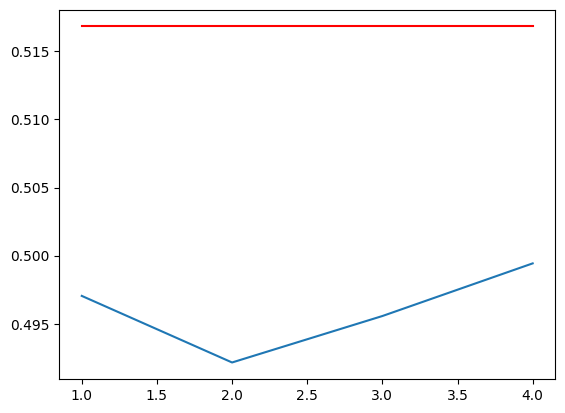

In [116]:
plt.plot([i for i in range(1,5)],train_accuracy)
plt.plot([i for i in range(1,5)],test_accuracy, color='red')
plt.show()

result is not in binary form

In [223]:
prd=ann.predict(x_test)


69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


list may ans ara tha we used [0]

In [224]:
for i in prd:
    print(i[0])

0.50318277
0.50318277
0.50318277
0.50318277
0.50318277
0.5282894
0.50318277
0.50318277
0.50318277
0.51901126
0.50318277
0.50318277
0.50318277
0.50318277
0.42424166
0.50318277
0.50318277
0.50318277
0.50318277
0.50318277
0.50318277
0.50318277
0.50318277
0.50318277
0.50318277
0.5313014
0.5263957
0.50318277
0.5124312
0.51814294
0.50318277
0.52503395
0.50318277
0.5298523
0.52980953
0.4773793
0.50318277
0.50318277
0.50318277
0.51202923
0.5146063
0.50318277
0.50318277
0.50318277
0.50318277
0.50318277
0.50318277
0.50318277
0.49030265
0.50318277
0.5573888
0.5051045
0.52311444
0.50318277
0.50318277
0.51562357
0.46366233
0.50318277
0.50318277
0.50318277
0.50318277
0.50318277
0.50318277
0.50318277
0.51792455
0.46539137
0.50318277
0.50318277
0.5287564
0.5171062
0.50318277
0.50318277
0.50318277
0.50318277
0.50318277
0.51593304
0.5361216
0.50318277
0.5383184
0.50318277
0.50318277
0.50318277
0.5308394
0.50318277
0.50318277
0.50318277
0.49701002
0.50318277
0.51667154
0.50318277
0.50318277
0.50318277
0.

In [225]:
pred_data=[]

for i in prd:
    if i[0]> 0.5:
        pred_data.append(1)
    else:
        pred_data.append(0)    

In [226]:
pred_data

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,


In [227]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred_data)*100

50.272727272727266

checking overfitting

In [228]:
prd1=ann.predict(x_train)
pred_data1=[]

for i in prd1:
    if i[0]> 0.5:
        pred_data1.append(1)
    else:
        pred_data1.append(0) 

275/275 ━━━━━━━━━━━━━━━━━━━━ 0s 797us/step


In [229]:
accuracy_score(y_train,pred_data1 )

0.5144318181818182

how do predict nuw value

In [230]:
x_test

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
107,0.972817,1.711560,0.372799,-0.961007,-1.229879,-1.009867,1.000910,-0.719269
5484,0.496902,-1.022502,-0.010023,0.604866,-1.229879,-1.009867,-0.999091,1.264602
6998,-1.537253,-0.338986,-0.010023,-1.219142,-1.229879,0.990230,-0.999091,1.482589
3984,1.203099,-1.500963,1.138442,0.914873,1.109912,0.990230,-0.999091,-0.093867
3111,-0.969225,-1.706017,-1.158488,0.107469,-0.059984,-1.009867,1.000910,1.624334
...,...,...,...,...,...,...,...,...
5284,0.757887,1.711560,-0.775666,-1.295116,-1.229879,0.990230,-0.999091,1.035042
3909,-0.516337,0.481232,-0.010023,-0.682300,-0.059984,-1.009867,1.000910,-0.167107
10549,1.203099,-1.569314,1.138442,-1.554818,1.109912,-1.009867,1.000910,-0.875439
5809,-0.385845,0.959693,-0.392845,-0.090777,-1.229879,0.990230,-0.999091,1.420659


In [231]:

for i in prd:
    print(i[0])

0.50318277
0.50318277
0.50318277
0.50318277
0.50318277
0.5282894
0.50318277
0.50318277
0.50318277
0.51901126
0.50318277
0.50318277
0.50318277
0.50318277
0.42424166
0.50318277
0.50318277
0.50318277
0.50318277
0.50318277
0.50318277
0.50318277
0.50318277
0.50318277
0.50318277
0.5313014
0.5263957
0.50318277
0.5124312
0.51814294
0.50318277
0.52503395
0.50318277
0.5298523
0.52980953
0.4773793
0.50318277
0.50318277
0.50318277
0.51202923
0.5146063
0.50318277
0.50318277
0.50318277
0.50318277
0.50318277
0.50318277
0.50318277
0.49030265
0.50318277
0.5573888
0.5051045
0.52311444
0.50318277
0.50318277
0.51562357
0.46366233
0.50318277
0.50318277
0.50318277
0.50318277
0.50318277
0.50318277
0.50318277
0.51792455
0.46539137
0.50318277
0.50318277
0.5287564
0.5171062
0.50318277
0.50318277
0.50318277
0.50318277
0.50318277
0.51593304
0.5361216
0.50318277
0.5383184
0.50318277
0.50318277
0.50318277
0.5308394
0.50318277
0.50318277
0.50318277
0.49701002
0.50318277
0.51667154
0.50318277
0.50318277
0.50318277
0.

conerted into array

In [232]:
import numpy as np
a=np.array([[-1.397541,0.381684,-0.887952,0.691539,-1.326745,1.016130,-1.032529,0.642703]])
print(a.shape)

(1, 8)


In [233]:
prd=ann.predict(a)
pred_data=[]

for i in prd:
    if i[0]> 0.5:
        pred_data.append(1)
    else:
        pred_data.append(0)  
pred_data        

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


[1]

In [234]:
y_test

107      1
5484     1
6998     1
3984     0
3111     1
        ..
5284     1
3909     0
10549    1
5809     1
7571     1
Name: Exited, Length: 2200, dtype: int64

drop out

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
dataset=pd.read_csv(r"C:\Users\Manasa\Downloads\synthetic_dataset_extended.csv")
dataset.head(3)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,559,60,4,180471.89,2,1,1,128389.95,0
1,594,28,8,142681.41,3,1,1,67745.86,1
2,606,50,8,30560.35,4,1,1,28446.98,1


In [4]:
dataset.isnull().sum().sum()

0

In [5]:
input=dataset.iloc[:,:-1]
output=dataset.iloc[:,-1]

In [6]:
st=StandardScaler()
input=pd.DataFrame(st.fit_transform(input), columns=input.columns)

In [7]:
x_train, x_test, y_train, y_test=train_test_split(input, output,test_size=0.2, random_state=42)

In [8]:
input.shape

(11000, 8)

In [9]:
import tensorflow
from keras.layers import Dense, BatchNormalization, Dropout
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.regularizers import l2

In [33]:
an=Sequential()
an.add(Dense(6,input_dim=8, activation='relu', kernel_regularizer=l2(0.01)))
# BatchNormalization()
# an.add(Dropout(0.3))
an.add(Dense(4, activation='relu'))
an.add(Dense(4, activation='relu'))
# BatchNormalization()
# an.add(Dropout(0.3))
an.add(Dense(3, activation='relu'))
an.add(Dense(3, activation='relu'))
an.add(Dense(1, activation='sigmoid'))

C:\Users\Manasa\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [34]:
an.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [41]:
an.fit(x_train, y_train, batch_size=100, epochs=1, validation_data=(x_test, y_test), callbacks=EarlyStopping())

88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5022 - loss: 0.6932 - val_accuracy: 0.5168 - val_loss: 0.6929


In [42]:
from sklearn.metrics import accuracy_score

In [43]:
p=an.predict(x_test)
p1=[]
for i in p:
    if i[0]>0.5:
        p1.append(1)
    else:
        p1.append(0)     

69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 861us/step


In [44]:
p2=an.predict(x_train)
p12=[]
for i in p2:
    if i[0]>0.5:
        p12.append(1)
    else:
        p12.append(0)     

275/275 ━━━━━━━━━━━━━━━━━━━━ 0s 603us/step


In [45]:
accuracy_score(y_test, p1)*100,accuracy_score(y_train, p12)*100

(51.68181818181819, 50.10227272727272)

cnn model

In [101]:
import tensorflow

In [102]:
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [103]:
cnn=Sequential()

input_shape=(64,64,3) size of your image,kernal 3,3 matrix, fliters 3

In [104]:
cnn.add(Conv2D(32,(3,3), input_shape=(64,64,3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Conv2D(16,(3,3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Flatten())


C:\Users\Manasa\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [105]:
cnn.add(Dense(64,activation='relu'))
cnn.add(Dense(32,activation='relu'))
cnn.add(Dense(16,activation='relu'))
cnn.add(Dense(8,activation='relu'))
cnn.add(Dense(4,activation='relu'))
cnn.add(Dense(1,activation='sigmoid'))

In [106]:
cnn.compile(loss='binary_crossentropy', optimizer='adam')

In [107]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        r"C:\Users\Manasa\OneDrive\画像\ドキュメント\Visual Studio 2017\manasa dataset\training_set",
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

test_generator = test_datagen.flow_from_directory(
        r"C:\Users\Manasa\OneDrive\画像\ドキュメント\Visual Studio 2017\manasa dataset\test_set",
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

cnn.fit(train_generator,steps_per_epoch=20,epochs=5,validation_data=test_generator)

Found 8005 images belonging to 1 classes.
Found 2019 images belonging to 1 classes.
Epoch 1/5


C:\Users\Manasa\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 232ms/step - loss: 0.2273 - val_loss: 8.6525e-10
Epoch 2/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 210ms/step - loss: 2.8125e-09 - val_loss: 7.6385e-13
Epoch 3/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 187ms/step - loss: 3.5122e-12 - val_loss: 2.1966e-13
Epoch 4/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 189ms/step - loss: 1.7334e-13 - val_loss: 1.8257e-13
Epoch 5/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 179ms/step - loss: 9.7176e-15 - val_loss: 1.7791e-13


In [108]:
from keras.preprocessing import image
import numpy as np

In [109]:
img=image.load_img(r"C:\Users\Manasa\OneDrive\画像\ドキュメント\Visual Studio 2017\manasa dataset\singles_images\dog.4040.jpg", target_size=(64,64))

In [110]:
img=image.img_to_array(img)


In [111]:
img=np.expand_dims(img, axis=0)

In [112]:
p=cnn.predict(img)
p


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


array([[0.]], dtype=float32)

In [113]:
if p[0][0]<0.5:
    print('dog')
else:
    print('cat')    

dog
